# Project - Credit Card Fraud Detection

### Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Read data from CSV 

In [13]:
fd= pd.read_csv("E:\onedrive world\OneDrive\Desktop\INTERNSHIP'S\Cod_Soft INTERNSHIP\Project- Credit Card Fraud Detection\Dataset\creditcard.csv")

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\LOQ\AppData\Local\Temp\ipykernel_6460\3009262440.py:1: SyntaxWarning: invalid escape sequence '\o'
  fd= pd.read_csv("E:\onedrive world\OneDrive\Desktop\INTERNSHIP'S\Cod_Soft INTERNSHIP\Project- Credit Card Fraud Detection\Dataset\creditcard.csv")


In [14]:
fd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
fd.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
fd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
# Checking for missing values
fd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Class Distribution
Visualizing Class Distribution to Analyze the Balance Between Fraud and Non-Fraud Transactions

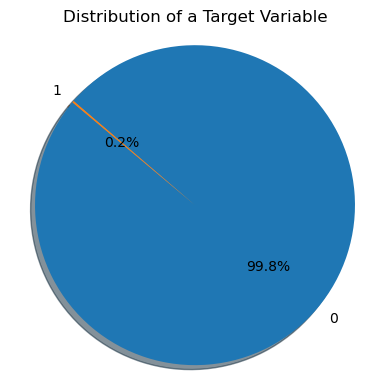

In [20]:
# Count the occurrences of each category
status_counts = fd.Class.value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140 , shadow=True)

plt.title('Distribution of a Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64


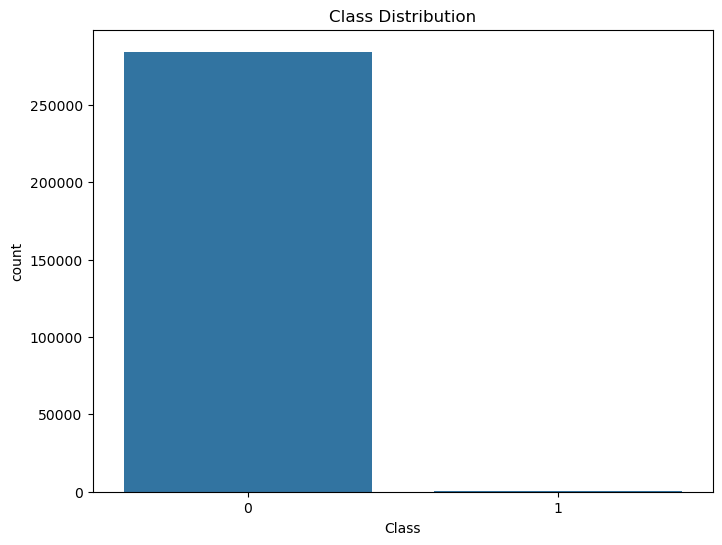

In [21]:
class_counts = fd['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=fd)
plt.title('Class Distribution')
plt.show()

### Feature-Target Separation and Data Splitting- Training and Testing 
Splitting the Dataset into Features (X) and Target (y), and Dividing into Training and Testing Sets

In [23]:
X = fd.drop('Class', axis=1)
y = fd['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the Features -StandardScaler
Feature Scaling with StandardScaler to Enhance Model Performance

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model
Build and train a Logistic Regression model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model on the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy", accuracy_score(y_test, y_pred_lr))
print("Precision", precision_score(y_test, y_pred_lr))
print("Recall", recall_score(y_test, y_pred_lr))
print("F1-Score", f1_score(y_test, y_pred_lr))

[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy 0.9990695551420246
Precision 0.8461538461538461
Recall 0.5612244897959183
F1-Score 0.6748466257668712


### RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest Classifier model
fd_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the RandomForest Classifier model on the training data
fd_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [154]:
# Predict on the testing data
y_pred_fd= fd_model.predict(X_test)

In [156]:
# Calculate accuracy
accuracy_fd = accuracy_score(y_test, y_pred_fd)
print("RandomForest Classifier Accuracy:", accuracy_fd)

# Generate confusion matrix
conf_matrix_fd = confusion_matrix(y_test, y_pred_fd)
print("RandomForest Classifier Confusion Matrix:")
print(conf_matrix_fd)

# Generate classification report
report_fd = classification_report(y_test, y_pred_fd)
print("RandomForest Classifier Classification Report:")
print(report_fd)

RandomForest Classifier Accuracy: 0.9995259997893332
RandomForest Classifier Confusion Matrix:
[[56862     2]
 [   25    73]]
RandomForest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Outlier Detection with Isolation Forest and Local Outlier Factor
unsupervised anomaly detection algorithms—Isolation Forest and Local Outlier Factor (LOF)—to detect fraud-

#### Isolation Forest

In [92]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)

y_pred_if = np.where(y_pred_if == -1, 1, 0)

# Evaluate Isolation Forest models
print("Calculated Isolation Forest")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if))

Calculated Isolation Forest
[[281755   2560]
 [   203    289]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



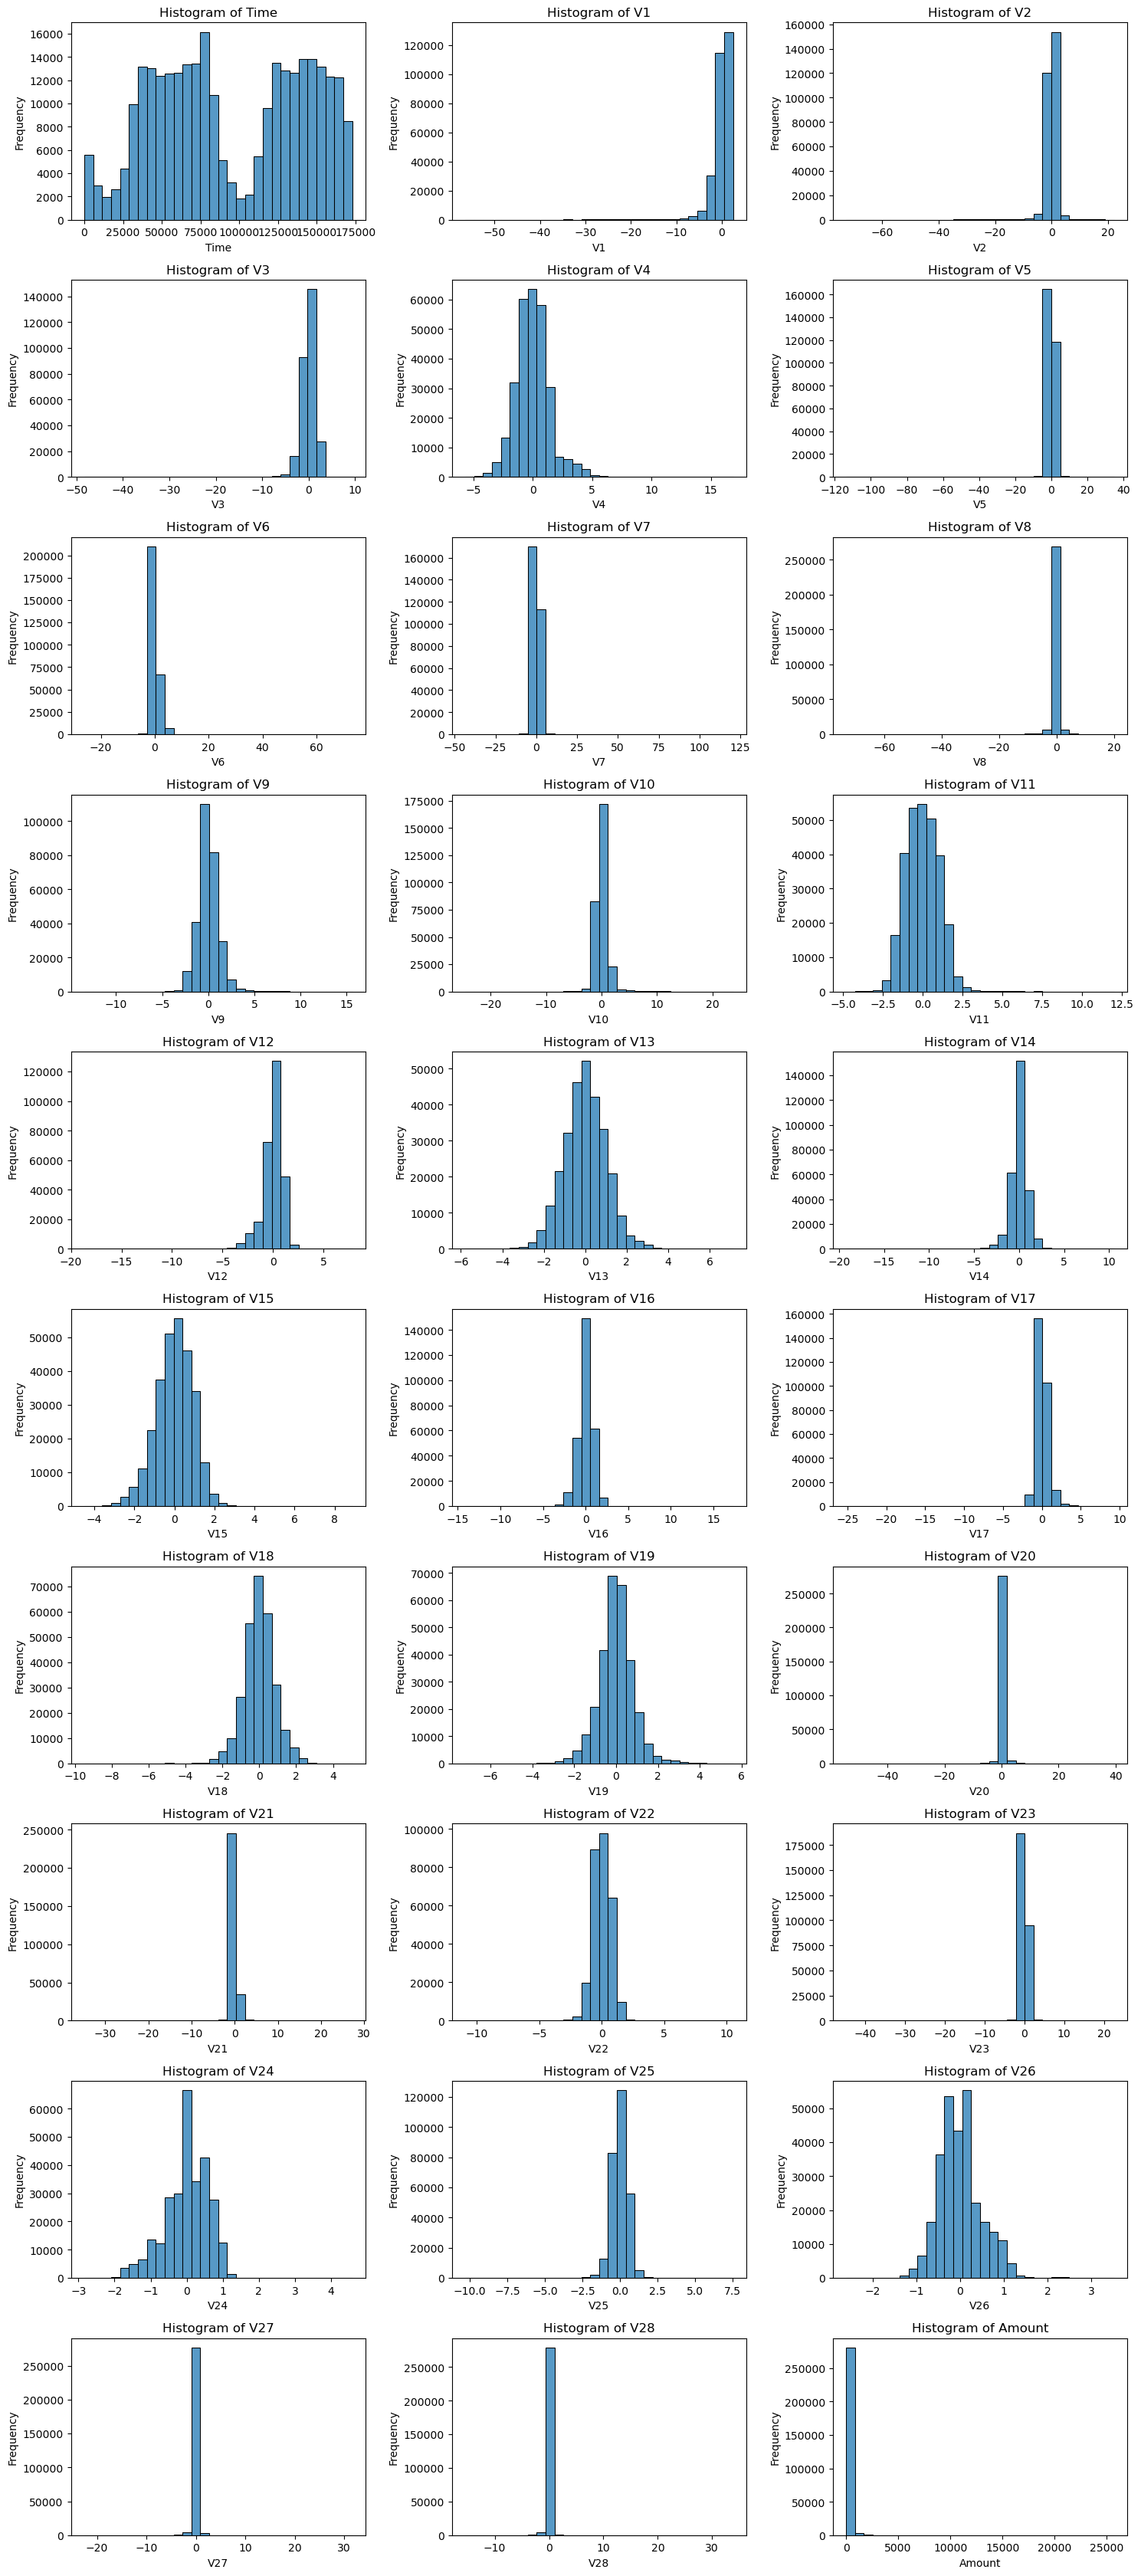

In [94]:
# Feature names
features = fd.columns[:-1]

# Set up the figure; 12 rows (12*3=36 subplots), adjust as needed
fig, axes = plt.subplots(12, 3, figsize=(15, 40))  # Adjust rows to fit all features

# Flatten axes array to loop through easily
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.histplot(fd[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if features < 30
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Local Outlier Factor

In [95]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)

y_pred_lof = np.where(y_pred_lof == -1, 1, 0)
# Evaluate both models
print("Local Outlier Factor:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))

Local Outlier Factor:
[[281540   2775]
 [   418     74]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.03      0.15      0.04       492

    accuracy                           0.99    284807
   macro avg       0.51      0.57      0.52    284807
weighted avg       1.00      0.99      0.99    284807



#### Correlation Analysis
Compute and Visualize Feature Correlations Using a Heatmap 

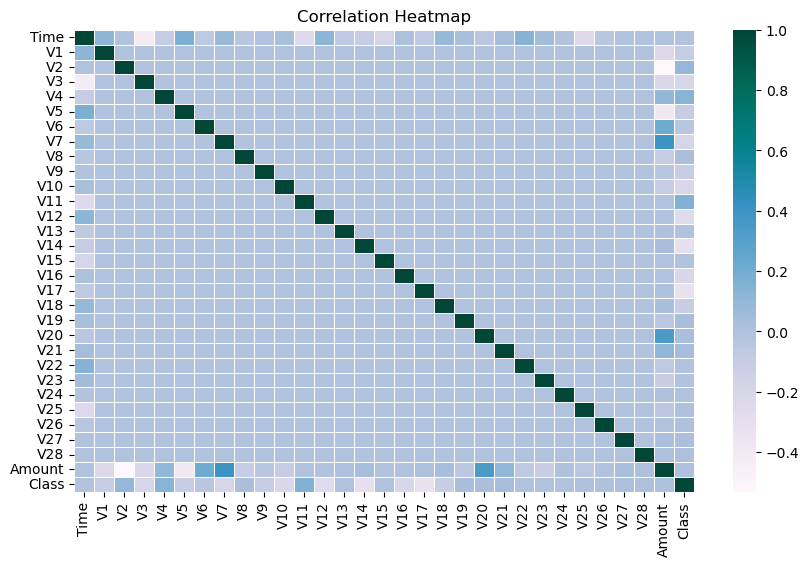

In [63]:
correlation_matrix = fd.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='PuBuGn', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
fd_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2)


# Train the Decision Tree Classifier model on the training data
fd_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_fd = fd_model.predict(X_test)

In [106]:
# Calculate accuracy
accuracy_fd = accuracy_score(y_test, y_pred_fd)
print("Decision Tree Classifier Accuracy:", accuracy_fd)

# Generate confusion matrix
conf_matrix_fd = confusion_matrix(y_test, y_pred_fd)
print("Decision Tree Classifier Confusion Matrix")
print(conf_matrix_dt)

Decision Tree Classifier Accuracy: 0.9992802219023208
Decision Tree Classifier Confusion Matrix
[[56854    10]
 [   31    67]]


In [109]:
# Generate classification report
report_fd = classification_report(y_test, y_pred_fd)
print("Decision Tree Classifier Classification Report:")
print(report_fd)

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



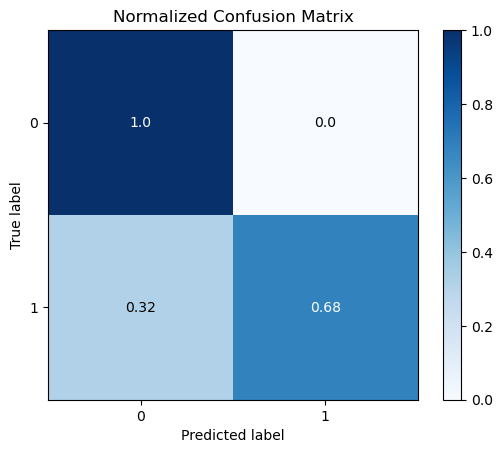

In [113]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_fd, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()

### XGBoost (Extreme Gradient Boosting)

In [118]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 590.8 kB/s eta 0:03:32
   ---------------------------------------- 0.2/124.9 MB 985.7 kB/s eta 0:02:07
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.4/124.9 MB 1.4 MB/s eta 0:01:31
   ---------------------------------------- 0.6/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.8/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.9/124.9 MB 1.9 MB/s eta 0:01:04
   ---------------------------------------- 1.0/124.9 MB 2.0 MB/s eta 0:01:03
 

In [120]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBClassifier model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the XGBClassifier model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
# Predict on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBClassifier AccuracyClassification Report:", accuracy_xgb)

XGBClassifier Accuracy Classification Report: 0.9995786664794073


In [124]:
# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBClassifier Confusion Matrix:")
print(conf_matrix_xgb)

# Generate classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBClassifier Classification Report:")
print(report_xgb)

XGBClassifier Confusion Matrix:
[[56862     2]
 [   22    76]]
XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#### Visualizing Class-Wise Feature Distributions
Visualizing Feature V1 to V5 Distributions for Fraudulent and Non-Fraudulent Transactions

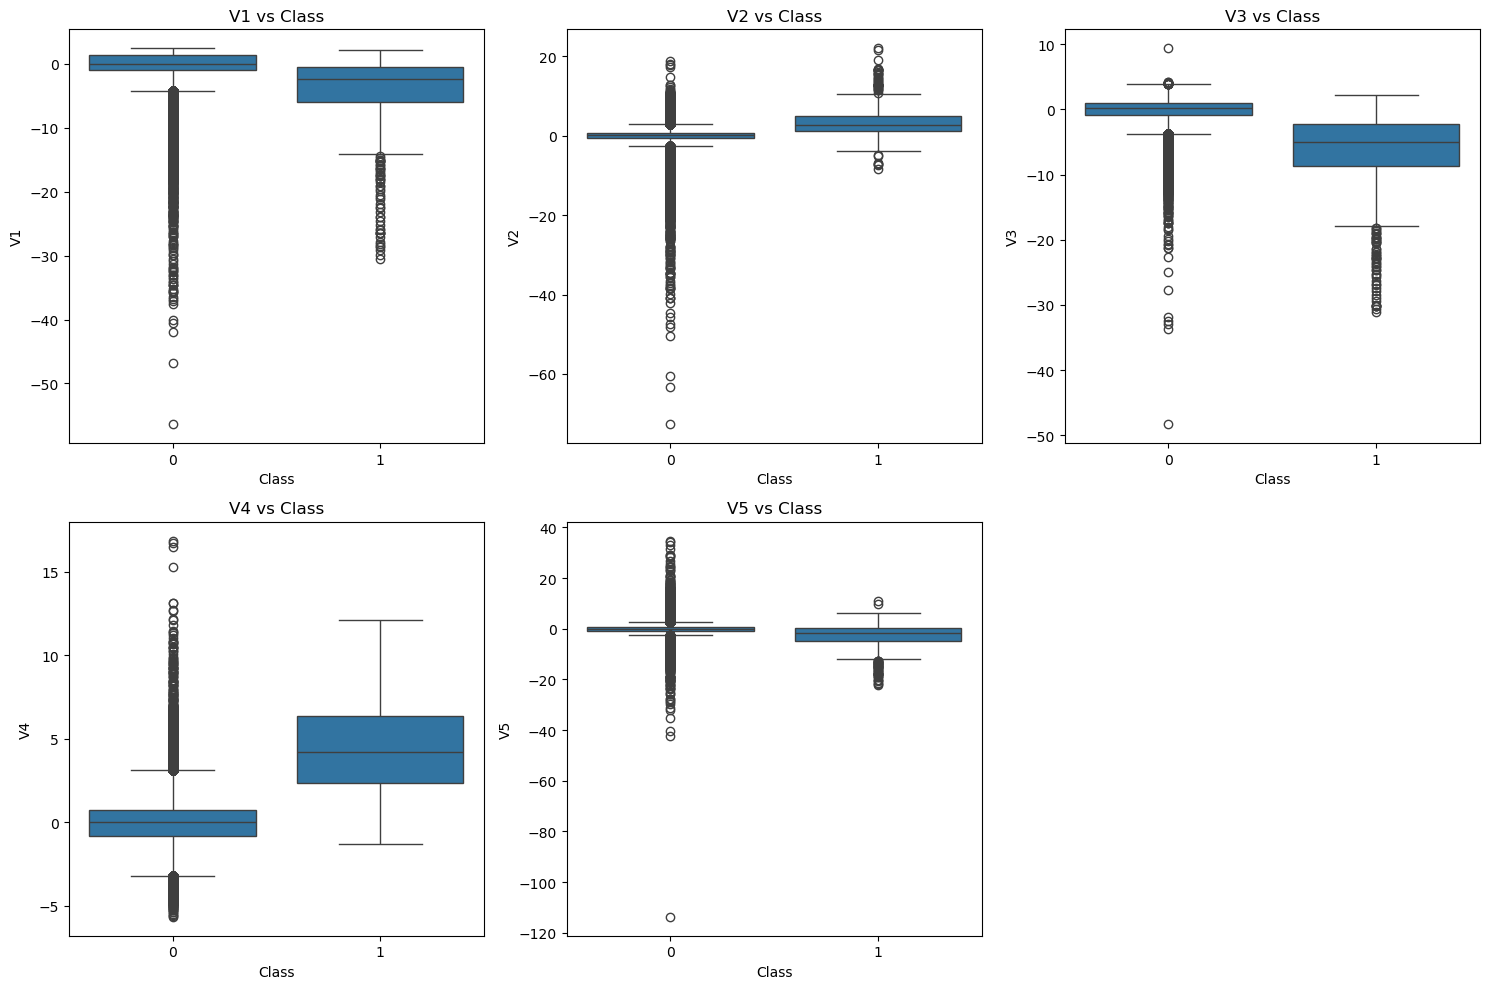

In [71]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15,10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=fd)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

### Separate and Analyzing Fraudulent vs Non-Fraudulent Transactions
separate the fraud and non-fraud transactions and display descriptive statistics for both

In [158]:
fraud_transactions = fd[fd['Class'] == 1]  # Separate Fraudulent Transactions
non_fraud_transations  = fd[fd['Class'] == 0]  # Separate non Fraudulent Transactions

# Describe Fraudulent Transactions

print("Fraud Transactions:")
print(fraud_transactions.describe())

# Describe non Fraudulent Transactions

print("\nNon-Fraud Transactions:")
print(non_fraud_transations.describe())

Fraud Transactions:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.

### Comparing Model Performance
comparing the performance of all models in terms of accuracy, precision, recall, and F1-score

In [166]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming fd is your DataFrame containing the data
X = fd.drop('Class', axis=1)  # Features
y = fd['Class']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)  # Predictions from Logistic Regression

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_tree = dt_model.predict(X_test)  # Predictions from Decision Tree Classifier

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  # Predictions from Random Forest Classifier

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # To avoid warnings
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)  # Predictions from XGBoost

# Isolation Forest
if_model = IsolationForest()
if_model.fit(X_train)
y_pred_if = if_model.predict(X_test)  # Predictions from Isolation Forest
y_pred_if = (y_pred_if == -1).astype(int)  # Convert to binary format (1 for fraud, 0 for non-fraud)

# Local Outlier Factor
lof_model = LocalOutlierFactor()
y_pred_lof = lof_model.fit_predict(X_test)  # Predictions from Local Outlier Factor
y_pred_lof = (y_pred_lof == 1).astype(int)  # Convert to binary format (1 for inliers, 0 for outliers)

# Prepare the metrics lists
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
          'XGBoost (Extreme Gradient Boosting)', 'Isolation Forest', 'Local Outlier Factor']

# Accuracy scores for all models
accuracies = [
    accuracy_score(y_test, y_pred_lr), 
    accuracy_score(y_test, y_pred_tree), 
    accuracy_score(y_test, y_pred_rf), 
    accuracy_score(y_test, y_pred_xgb), 
    accuracy_score(y_test, y_pred_if), 
    accuracy_score(y_test, y_pred_lof)
]

# Precision scores for all models
precisions = [
    precision_score(y_test, y_pred_lr), 
    precision_score(y_test, y_pred_tree), 
    precision_score(y_test, y_pred_rf), 
    precision_score(y_test, y_pred_xgb), 
    precision_score(y_test, y_pred_if), 
    precision_score(y_test, y_pred_lof)
]

# Recall scores for all models
recalls = [
    recall_score(y_test, y_pred_lr), 
    recall_score(y_test, y_pred_tree), 
    recall_score(y_test, y_pred_rf), 
    recall_score(y_test, y_pred_xgb), 
    recall_score(y_test, y_pred_if), 
    recall_score(y_test, y_pred_lof)
]

# F1 scores for all models
f1_scores = [
    f1_score(y_test, y_pred_lr), 
    f1_score(y_test, y_pred_tree), 
    f1_score(y_test, y_pred_rf), 
    f1_score(y_test, y_pred_xgb), 
    f1_score(y_test, y_pred_if), 
    f1_score(y_test, y_pred_lof)
]

# Print lengths of all metric lists
print("Lengths of each metric list:")
print(f"Accuracy: {len(accuracies)}")
print(f"Precision: {len(precisions)}")
print(f"Recall: {len(recalls)}")
print(f"F1-Score: {len(f1_scores)}")

# Ensure that all lengths are the same before creating the DataFrame
if len(models) == len(accuracies) == len(precisions) == len(recalls) == len(f1_scores):
    fd_results = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1-Score': f1_scores
    })
    print(fd_results)
else:
    print("Error: One or more metric lists have different lengths. Please check your model predictions.")


F:\Python-ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Python-ANACONDA\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Lengths of each metric list:
Accuracy: 6
Precision: 6
Recall: 6
F1-Score: 6
                                 Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.998631   0.611111  0.561224   
1             Decision Tree Classifier  0.999157   0.727273  0.816327   
2             Random Forest Classifier  0.999579   0.962500  0.785714   
3  XGBoost (Extreme Gradient Boosting)  0.999561   0.962025  0.775510   
4                     Isolation Forest  0.960553   0.035050  0.826531   
5                 Local Outlier Factor  0.070608   0.001547  0.836735   

   F1-Score  
0  0.585106  
1  0.769231  
2  0.865169  
3  0.858757  
4  0.067248  
5  0.003088  


#### Visualizing Amount Distribution by Class
visualization the distribution of the transaction amounts for both classes 

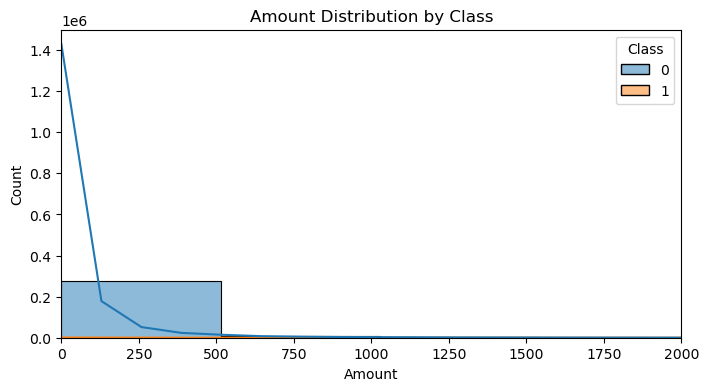

In [168]:
plt.figure(figsize=(8, 4))
sns.histplot(data=fd, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Amount Distribution by Class')
plt.xlim(0, 2000)
plt.show()
